In [6]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os
import numpy as np
cwd = os.getcwd()

def create_param_ranges(file_path):
    param_ranges = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 3:
                param_name = parts[0]
                param_range = (float(parts[1]), float(parts[2]))
                param_ranges[param_name] = param_range
    return param_ranges


In [7]:
# Setting up the values

parameters_file = f"{cwd}/LHC_Parameters.txt"
parameters = {}

with open(parameters_file, 'r') as file:
    column_count = len(file.readline().strip().split())
    line_count = sum(1 for line in file)
Array = np.zeros((line_count+1, column_count)); Array[:]=np.nan
print(f'The script will use {line_count+1} simulations.')
print(f'The PPE contains {column_count} parameters.')

with open(parameters_file, 'r') as f_params:
    for i, line in enumerate(f_params):
        #print(count)

        parts = line.strip().split()
        scaling_factors = list(map(float, parts[:]))
        Array[i,:] = scaling_factors
lower = []
upper = []
names = []

parameters_file = f"{cwd}/parameters_for_script.txt"
Parameters_and_ranges = create_param_ranges(parameters_file)
param_ranges = Parameters_and_ranges.values()

lower = []
upper = []
names = []

for i, (low, high) in enumerate(param_ranges):
    lower.append(low)
    upper.append(high)
for i, name in enumerate(Parameters_and_ranges.items()):
    names.append(name[0])

l_bound = np.array(lower)
u_bound = np.array(upper)
names = np.array(names)


The script will use 200 simulations.
The PPE contains 17 parameters.


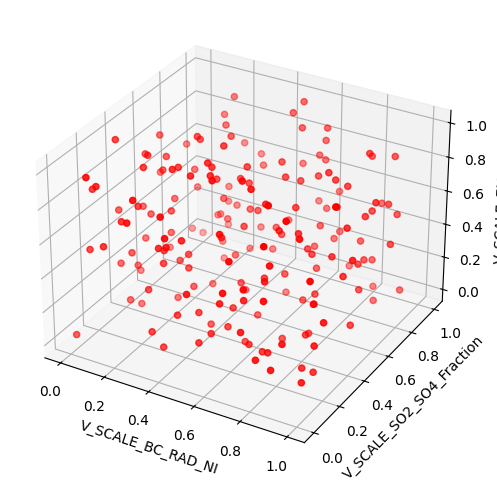

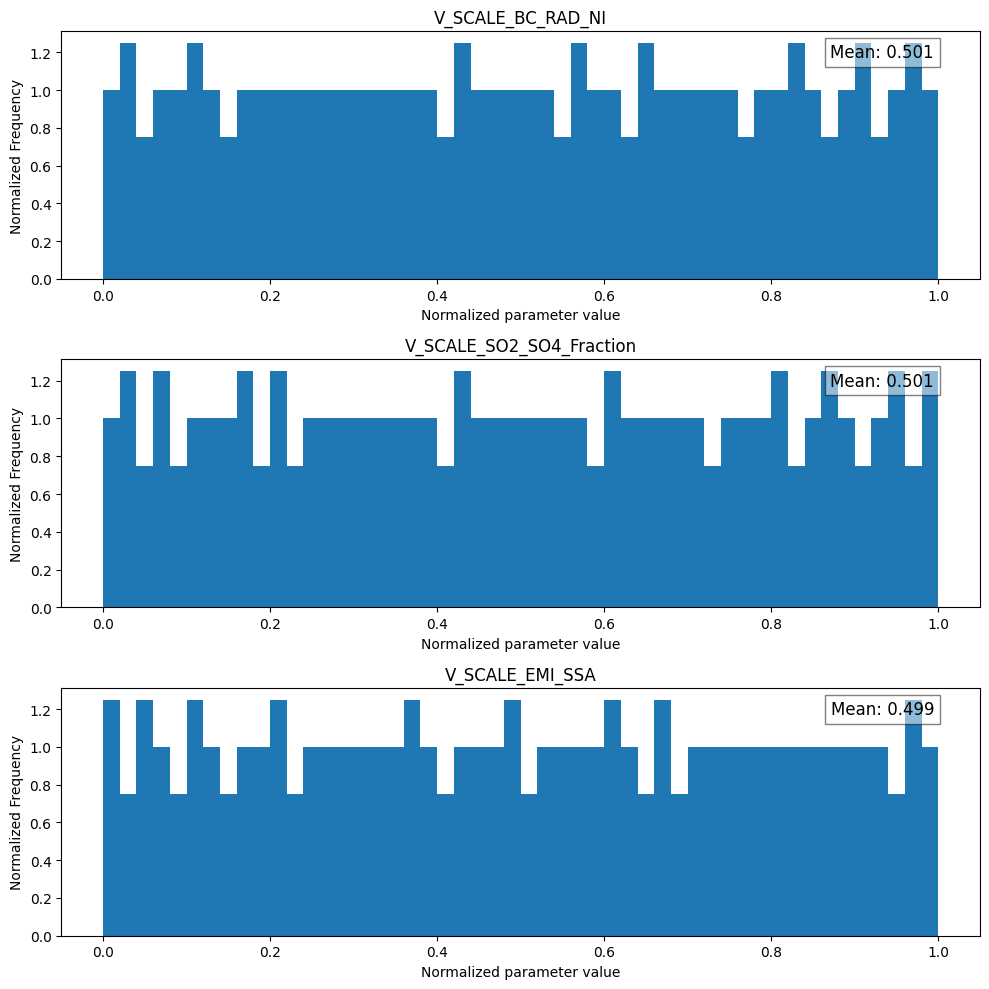

In [8]:
# Normalize data to the range [0, 1] (if necessary)
scaler = MinMaxScaler()
samples_normalized = scaler.fit_transform(Array)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

### CHOOSE ANY 3 PARAMETERS YOU WANT TO LOOK AT ###
para1 = 0
para2 = 7
para3 = 8

parameter_index = [para1,para2,para3]
indexed_parameter_names = names[parameter_index]
# Plot for Latin Hypercube Sampling

Data = [samples_normalized[:, para1], samples_normalized[:, para2], samples_normalized[:, para3]]
data = np.array(Data)
# Plot the normalized LHS samples
ax.scatter(samples_normalized[:, para1], samples_normalized[:, para2], samples_normalized[:, para3], c='r', marker='o')

# Set labels
ax.set_xlabel(f'{names[para1]}')
ax.set_ylabel(f'{names[para2]}')
ax.set_zlabel(f'{names[para3]}')

# Show the plot
plt.show()


# Compute means of each dimension
means = np.mean(Data, axis=1)

# Create a figure with subplots for histograms
fig, axes = plt.subplots(np.shape(parameter_index)[0], 1, figsize=(10, 10))

# Plot histograms for each dimension
for i, param in zip(range(np.shape(parameter_index)[0]),parameter_index):
    ax = axes[i]
    ax.hist(samples_normalized[:, param], bins=50, edgecolor='None', density=True)
    ax.set_xlabel(f'Normalized parameter value')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'{indexed_parameter_names[i]}')
    
    # Annotate the mean value in the upper right
    mean_value = means[i]
    ax.text(0.95, 0.95, f'Mean: {mean_value:.3f}', 
            horizontalalignment='right', 
            verticalalignment='top', 
            transform=ax.transAxes, 
            fontsize=12, 
            bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()